<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.granularity = Granularity.HOURLY

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))
d.add_dimension(name="interface", function="X Y Z".split())
d.add_dimension(name="const",function=3)

In [4]:
d.data

,epoch,product,product_id,interface,const
2019-01-01 00:00:00,1546300800,D,5659,X,3
2019-01-01 01:00:00,1546304400,A,169,Y,3
2019-01-01 02:00:00,1546308000,B,5569,Z,3
2019-01-01 03:00:00,1546311600,C,7592,X,3
2019-01-01 04:00:00,1546315200,A,8391,Y,3
...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,B,4472,Z,3
2019-01-11 21:00:00,1547240400,D,3730,X,3
2019-01-11 22:00:00,1547244000,A,2429,Y,3
2019-01-11 23:00:00,1547247600,D,1343,Z,3


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

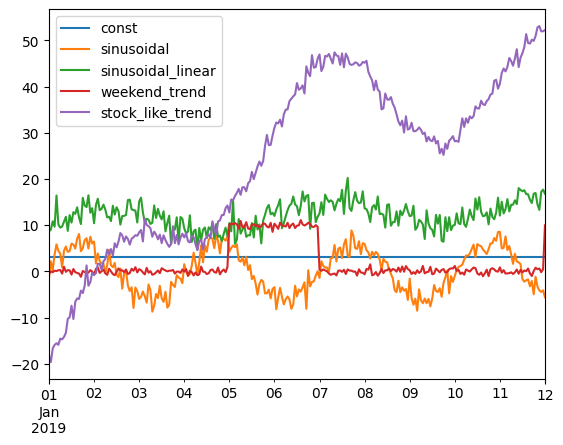

In [6]:
d.plot(exclude=['product_id'])

In [7]:
d.data

,epoch,product,product_id,interface,const,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,D,5659,X,3,-1.524969,8.607503,-0.572341,-18.218589
2019-01-01 01:00:00,1546304400,A,169,Y,3,2.164741,9.056761,-0.026356,-19.646898
2019-01-01 02:00:00,1546308000,B,5569,Z,3,0.224253,10.843849,-0.185800,-16.698577
2019-01-01 03:00:00,1546311600,C,7592,X,3,3.650233,9.670132,0.145155,-15.924679
2019-01-01 04:00:00,1546315200,A,8391,Y,3,5.840358,16.417118,0.052740,-15.559480
...,...,...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,B,4472,Z,3,-3.286337,14.521302,0.461600,52.823995
2019-01-11 21:00:00,1547240400,D,3730,X,3,-4.123226,13.308529,0.609105,53.103103
2019-01-11 22:00:00,1547244000,A,2429,Y,3,-4.453994,17.213042,-0.186686,51.964508
2019-01-11 23:00:00,1547247600,D,1343,Z,3,-4.111294,17.689436,0.447821,51.980547


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [8]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,D,X,3,8.607503,-0.572341,-18.218589
2019-01-01 01:00:00,1546304400,A,Y,3,9.056761,-0.026356,-19.646898
2019-01-01 02:00:00,1546308000,B,Z,3,10.843849,-0.185800,-16.698577
2019-01-01 03:00:00,1546311600,C,X,3,9.670132,0.145155,-15.924679
2019-01-01 04:00:00,1546315200,A,Y,3,16.417118,0.052740,-15.559480
...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,B,Z,3,14.521302,0.461600,52.823995
2019-01-11 21:00:00,1547240400,D,X,3,13.308529,0.609105,53.103103
2019-01-11 22:00:00,1547244000,A,Y,3,17.213042,-0.186686,51.964508
2019-01-11 23:00:00,1547247600,D,Z,3,17.689436,0.447821,51.980547


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [9]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,A,Y,3,12.417733,0.509146,-19.699272
2019-01-01 01:00:00,1546304400,A,Z,3,11.103063,0.531263,-19.201054
2019-01-01 02:00:00,1546308000,D,X,3,9.600252,0.265416,-17.919720
2019-01-01 03:00:00,1546311600,D,Y,3,13.530396,-0.182376,-16.801028
2019-01-01 04:00:00,1546315200,B,Z,3,10.035168,0.099427,-15.050074
...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,15.041852,0.160739,33.873655
2019-01-11 22:00:00,1547244000,C,Z,3,14.838620,-0.538089,33.823355
2019-01-11 23:00:00,1547247600,B,X,3,14.030037,-0.346390,34.299112
2019-01-12 00:00:00,1547251200,B,Y,3,15.521452,10.442896,33.606583


### Adding multi dimension/metric
In case you want to add a dimensions or metrics that are linked

In [10]:
import random
def my_custom_function():
    while True:
        val1 = random.randint(1,100)
        val2 =  random.randint(1,100)
        val3 = val1 + val2
        yield (val1, val2, val3)

d.add_multi_items(names="val1 val2 val3".split(), function=my_custom_function())

    

In [11]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3
2019-01-01 00:00:00,1546300800,A,Y,3,12.417733,0.509146,-19.699272,4,100,104
2019-01-01 01:00:00,1546304400,A,Z,3,11.103063,0.531263,-19.201054,7,97,104
2019-01-01 02:00:00,1546308000,D,X,3,9.600252,0.265416,-17.919720,49,17,66
2019-01-01 03:00:00,1546311600,D,Y,3,13.530396,-0.182376,-16.801028,2,46,48
2019-01-01 04:00:00,1546315200,B,Z,3,10.035168,0.099427,-15.050074,33,87,120
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,15.041852,0.160739,33.873655,92,49,141
2019-01-11 22:00:00,1547244000,C,Z,3,14.838620,-0.538089,33.823355,30,56,86
2019-01-11 23:00:00,1547247600,B,X,3,14.030037,-0.346390,34.299112,86,25,111
2019-01-12 00:00:00,1547251200,B,Y,3,15.521452,10.442896,33.606583,60,8,68


In [12]:
d.add_multi_items(names="val4 val5 val6".split(), function=my_custom_function())

In [13]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3,val4,val5,val6
2019-01-01 00:00:00,1546300800,A,Y,3,12.417733,0.509146,-19.699272,4,100,104,70,81,151
2019-01-01 01:00:00,1546304400,A,Z,3,11.103063,0.531263,-19.201054,7,97,104,49,22,71
2019-01-01 02:00:00,1546308000,D,X,3,9.600252,0.265416,-17.919720,49,17,66,35,73,108
2019-01-01 03:00:00,1546311600,D,Y,3,13.530396,-0.182376,-16.801028,2,46,48,41,62,103
2019-01-01 04:00:00,1546315200,B,Z,3,10.035168,0.099427,-15.050074,33,87,120,84,52,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,15.041852,0.160739,33.873655,92,49,141,66,84,150
2019-01-11 22:00:00,1547244000,C,Z,3,14.838620,-0.538089,33.823355,30,56,86,8,28,36
2019-01-11 23:00:00,1547247600,B,X,3,14.030037,-0.346390,34.299112,86,25,111,12,42,54
2019-01-12 00:00:00,1547251200,B,Y,3,15.521452,10.442896,33.606583,60,8,68,98,46,144


In [14]:
d.remove_multi_item(["val1"])
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val4,val5,val6
2019-01-01 00:00:00,1546300800,A,Y,3,12.417733,0.509146,-19.699272,70,81,151
2019-01-01 01:00:00,1546304400,A,Z,3,11.103063,0.531263,-19.201054,49,22,71
2019-01-01 02:00:00,1546308000,D,X,3,9.600252,0.265416,-17.919720,35,73,108
2019-01-01 03:00:00,1546311600,D,Y,3,13.530396,-0.182376,-16.801028,41,62,103
2019-01-01 04:00:00,1546315200,B,Z,3,10.035168,0.099427,-15.050074,84,52,136
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,15.041852,0.160739,33.873655,66,84,150
2019-01-11 22:00:00,1547244000,C,Z,3,14.838620,-0.538089,33.823355,8,28,36
2019-01-11 23:00:00,1547247600,B,X,3,14.030037,-0.346390,34.299112,12,42,54
2019-01-12 00:00:00,1547251200,B,Y,3,15.521452,10.442896,33.606583,98,46,144


In [15]:
d

DataGen Class
  dimensions    = [
                    {"name": "product", "function": "<generator object random_choice"}
                    {"name": "interface", "function": "<itertools.cycle object"}
                    {"name": "const", "function": "<generator object constant"}
                  ]
  metrics       = [
                    {"name": "sinusoidal_linear", "trends": ["sine", "linear"]}
                    {"name": "weekend_trend", "trends": ["weekend"]}
                    {"name": "stock_like_trend", "trends": ["stock", "Linear"]}
                  ]
  multi_items   = [
                    {"names": ["val4", "val5", "val6"], "function": "<generator object my_custom_function"}
                  ]
  start        = 2019-01-01
  end          = 2019-01-12 01:05:00
  granularity  = HOURLY